<a href="https://colab.research.google.com/github/Rraihan142/Absensi_Karyawan_Flutter/blob/main/Analisis_Data_Merakit_Pc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selamat datang di Pembantu Rakit PC untuk Data Analyst!
Masukkan budget Anda (dalam Rupiah, contoh: 5000000): 8000000

--- Mencari Rekomendasi Rakitan PC untuk Data Analyst dengan Budget Rp 8,000,000 ---

### Mencari Rekomendasi Intel (dengan dedicated GPU)... ###

### Mencari Rekomendasi AMD (dengan dedicated GPU)... ###

--- Ditemukan 5083 Rakitan dalam Budget Anda ---
Menampilkan 3 Rekomendasi Terbaik (paling seimbang dan optimal untuk budget):


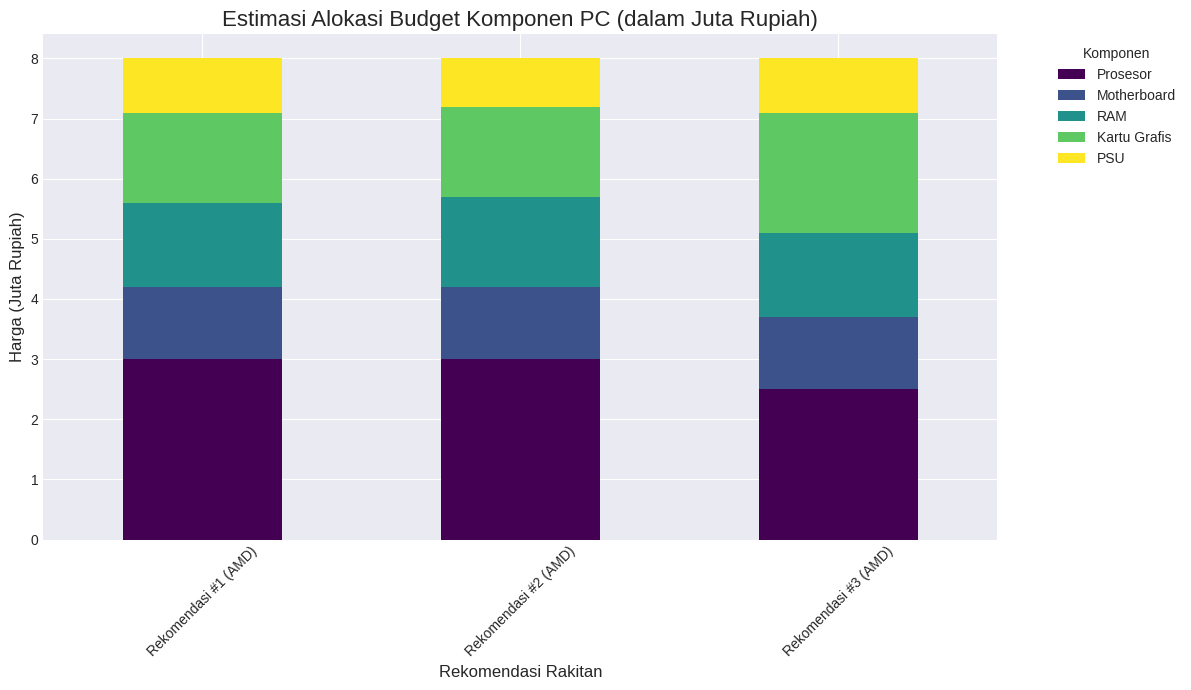


==================== Rekomendasi #1 ====================
Platform: **AMD**
- **Prosesor:** Ryzen 7 5700X (Tier CPU: 8.0, Threads: 16.0) (Rp 3,000,000)
- **Motherboard:** ASRock B450M Steel Legend (Rp 1,200,000)
- **RAM:** G.Skill Ripjaws V 32GB (2x16GB) 3600MHz (32GB 3600MHz) (Rp 1,400,000)
- **Kartu Grafis:** Radeon RX 570 4GB (Tier GPU: 4) (Rp 1,500,000)
- **PSU:** Deepcool PK600D (600W, Tier PSU: 3) (Rp 900,000)
**Total Estimasi Harga: Rp 8,000,000**

**Strategi Upgrade (Tipe Seimbang - Dengan Kartu Grafis Diskrit):**
Rakituan ini menawarkan performa yang lebih tinggi sejak awal, terutama dalam beban kerja yang mengandalkan GPU (seperti visualisasi data kompleks, Machine Learning ringan, atau gaming) serta pemrosesan CPU yang kuat. Anda akan mendapatkan pengalaman yang lebih lancar. Untuk upgrade di masa depan, Anda bisa mengganti kartu grafis dengan yang lebih baru untuk peningkatan performa grafis. Namun, jika Anda ingin upgrade prosesor ke generasi yang jauh lebih baru (misalnya

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

# --- 1. Fungsi untuk Memuat Data CSV ---
def load_data():
    try:
        df_cpu = pd.read_csv('prosesor.csv')
        df_mobo = pd.read_csv('motherboard.csv')
        df_ram = pd.read_csv('ram.csv')
        df_gpu = pd.read_csv('kartu_grafis.csv')
        df_psu = pd.read_csv('psu.csv')
        return df_cpu, df_mobo, df_ram, df_gpu, df_psu
    except FileNotFoundError as e:
        print(f"Error: File CSV tidak ditemukan. Pastikan semua file CSV ({e.filename}) ada di sesi Colab Anda.")
        print("Silakan unggah file CSV (`prosesor.csv`, `motherboard.csv`, `ram.csv`, `kartu_grafis.csv`, `psu.csv`) ke sesi Colab.")
        return None, None, None, None, None

# --- 2. Fungsi Rekomendasi Rakitan PC ---
def rekomendasikan_pc(budget, df_cpu, df_mobo, df_ram, df_gpu, df_psu):
    print(f"\n--- Mencari Rekomendasi Rakitan PC untuk Data Analyst dengan Budget Rp {budget:,.0f} ---")

    found_builds = []

    # --- Kriteria Bottleneck dan Filter Minimum ---
    # Alokasi budget yang sedikit lebih fleksibel
    df_cpu_filtered = df_cpu[df_cpu['estimasi_harga_rp'] <= budget * 0.55].copy()
    df_mobo_filtered = df_mobo[df_mobo['estimasi_harga_rp'] <= budget * 0.35].copy()
    df_ram_filtered = df_ram[df_ram['estimasi_harga_rp'] <= budget * 0.35].copy() # RAM mendapat porsi lebih besar
    df_gpu_filtered = df_gpu[df_gpu['estimasi_harga_rp'] <= budget * 0.6].copy() # GPU bisa sedikit lebih rendah alokasinya
    df_psu_filtered = df_psu[df_psu['estimasi_harga_rp'] <= budget * 0.2].copy()

    min_cpu_tier = 3 # Minimal i3 Gen 8+/Ryzen 3 2200G+ for basic analysis
    min_gpu_tier = 1 # GPU bisa sangat rendah jika fokus pada CPU/RAM
    min_ram_capacity = 16 # **Minimum 16GB RAM untuk Data Analyst**
    min_psu_tier = 2 # PSU dasar yang layak

    if budget >= 15000000:
        min_cpu_tier = 8 # i7 Gen 12+/Ryzen 7 5000+
        min_gpu_tier = 7 # RTX 4060+/RX 7600+ (for light ML/viz)
        min_ram_capacity = 32 # **Prioritas utama 32GB RAM**
        min_psu_tier = 7 # Gold 750W+
    elif budget >= 10000000:
        min_cpu_tier = 7 # i5 Gen 12+/Ryzen 5 5000+
        min_gpu_tier = 6 # RTX 2060+/RX 6600+
        min_ram_capacity = 32 # **Prioritas 32GB RAM**
        min_psu_tier = 5 # Gold 650W+
    elif budget >= 7000000:
        min_cpu_tier = 5 # i3 Gen 11+/Ryzen 5 3000+
        min_gpu_tier = 4 # GTX 1060+/RX 570+
        min_ram_capacity = 16 # Minimal 16GB RAM
        min_psu_tier = 3 # Bronze 550W+
    elif budget >= 4000000:
        min_cpu_tier = 4 # i3 Gen 10+/Ryzen 3 3200G+ (lebih baik dari Gen 8)
        min_gpu_tier = 2 # GTX 1050+/RX 550+
        min_ram_capacity = 16 # Minimal 16GB RAM
        min_psu_tier = 2 # White 450W+
    elif budget >= 2500000: # Untuk budget 2.5jt - 4jt, prioritaskan APU/iGPU
        min_cpu_tier = 3 # Ryzen 3 2200G+, i3 Gen 9+
        min_gpu_tier = 1 # GPU sangat rendah jika hanya iGPU
        min_ram_capacity = 8 # Minimal 8GB, tapi 16GB sangat dianjurkan
        min_psu_tier = 1 # PSU paling dasar juga boleh

    # Filter CPU agar tidak merekomendasikan i3 Gen 8 (nama model spesifik)
    df_cpu_filtered = df_cpu_filtered[df_cpu_filtered['nama_model'] != 'Core i3-8100']


    # Terapkan filter berdasarkan tier minimum
    df_cpu_filtered = df_cpu_filtered[df_cpu_filtered['performance_tier'] >= min_cpu_tier]
    df_gpu_filtered = df_gpu_filtered[df_gpu_filtered['performance_tier'] >= min_gpu_tier]
    df_ram_filtered = df_ram_filtered[df_ram_filtered['total_kapasitas_gb'] >= min_ram_capacity]
    df_psu_filtered = df_psu_filtered[df_psu_filtered['performance_tier'] >= min_psu_tier]

    # Urutkan: CPU berdasarkan (total_thread DESC, performance_tier DESC, harga ASC)
    # RAM berdasarkan (total_kapasitas_gb DESC, kecepatan_mhz DESC, harga ASC)
    # GPU berdasarkan (performance_tier DESC, harga ASC)
    df_cpu_filtered = df_cpu_filtered.sort_values(by=['jumlah_thread', 'performance_tier', 'estimasi_harga_rp'], ascending=[False, False, True])
    df_mobo_filtered = df_mobo_filtered.sort_values(by='estimasi_harga_rp')
    df_ram_filtered = df_ram_filtered.sort_values(by=['total_kapasitas_gb', 'kecepatan_mhz', 'estimasi_harga_rp'], ascending=[False, False, True])
    df_gpu_filtered = df_gpu_filtered.sort_values(by=['performance_tier', 'estimasi_harga_rp'], ascending=[False, True])
    df_psu_filtered = df_psu_filtered.sort_values(by=['performance_tier', 'estimasi_harga_rp'], ascending=[False, True])

    # --- Fungsi Pembantu untuk Memeriksa Kompatibilitas dan Menambah Rakitan ---
    def add_build_if_valid(cpu, mobo, ram, gpu, psu, use_integrated_gpu_flag):
        current_cost = cpu['estimasi_harga_rp'] + mobo['estimasi_harga_rp'] + ram['estimasi_harga_rp'] + psu['estimasi_harga_rp']

        gpu_tier_for_bottleneck = cpu['performance_tier']
        build_type = "Balanced (Dedicated GPU)"
        gpu_name = ""
        gpu_cost = 0

        # Skenario 1: Rakitan dengan Grafis Terintegrasi (APU/CPU dengan iGPU)
        if use_integrated_gpu_flag:
            if pd.isna(cpu['grafis_terintegrasi']) or cpu['grafis_terintegrasi'] == 'NA':
                return

            gpu_name = f"Grafis Terintegrasi ({cpu['grafis_terintegrasi']})"
            gpu_cost = 0
            build_type = "APU (Integrated Graphics)"

        # Skenario 2: Rakitan dengan Kartu Grafis Diskrit
        else:
            if gpu is None:
                return

            gpu_name = gpu['nama_model']
            gpu_cost = gpu['estimasi_harga_rp']
            gpu_tier_for_bottleneck = gpu['performance_tier']

            if psu['wattage'] < gpu['rekomendasi_psu_watt']:
                return

            # --- Bottleneck check (CPU vs GPU performance tier) ---
            # Toleransi perbedaan tier sedikit lebih besar karena fokus ke CPU/RAM
            if abs(cpu['performance_tier'] - gpu_tier_for_bottleneck) > 4: # Diperlonggar sedikit dari 3 ke 4
                return

            # Tambahan: Jangan rekomendasikan GPU terlalu tua dengan CPU modern (misal, CPU tier 8+ dengan GPU tier < 4)
            if cpu['performance_tier'] >= 8 and gpu_tier_for_bottleneck < 4:
                return

        total_cost = current_cost + gpu_cost
        if total_cost <= budget:
            found_builds.append({
                'merk_cpu': cpu['merk'],
                'prosesor': cpu['nama_model'],
                'harga_prosesor': cpu['estimasi_harga_rp'],
                'motherboard': mobo['nama_model'],
                'harga_motherboard': mobo['estimasi_harga_rp'],
                'ram': ram['nama_model'],
                'harga_ram': ram['estimasi_harga_rp'],
                'kartu_grafis': gpu_name,
                'harga_kartu_grafis': gpu_cost,
                'psu': psu['nama_model'],
                'wattage_psu': psu['wattage'],
                'harga_psu': psu['estimasi_harga_rp'],
                'total_harga': total_cost,
                'avg_tier': (cpu['performance_tier'] + gpu_tier_for_bottleneck) / 2,
                'build_type': build_type
            })

    # --- Iterasi untuk menemukan kombinasi ---

    # Prioritaskan pencarian AMD APU jika budget rendah, lalu Intel iGPU
    if budget < 6000000:
        print("\nPrioritizing Integrated Graphics (APU/iGPU) builds for lower budgets...")

        # Iterate AMD CPU with iGPU (APU)
        for idx_cpu, cpu in df_cpu_filtered[df_cpu_filtered['merk'] == 'AMD'].iterrows():
            if pd.notna(cpu['grafis_terintegrasi']) and cpu['grafis_terintegrasi'] != 'NA':
                for idx_mobo, mobo in df_mobo_filtered[df_mobo_filtered['socket'] == cpu['socket']].iterrows():
                    df_ram_compat = df_ram_filtered[df_ram_filtered['tipe_ram'] == mobo['tipe_ram_didukung']]
                    if df_ram_compat.empty: continue
                    for idx_ram, ram in df_ram_compat.iterrows():
                        for idx_psu, psu in df_psu_filtered.iterrows():
                            add_build_if_valid(cpu, mobo, ram, None, psu, use_integrated_gpu_flag=True)

        # Then, iterate Intel with iGPU
        for idx_cpu, cpu in df_cpu_filtered[df_cpu_filtered['merk'] == 'Intel'].iterrows():
            if pd.notna(cpu['grafis_terintegrasi']) and cpu['grafis_terintegrasi'] != 'NA':
                for idx_mobo, mobo in df_mobo_filtered[df_mobo_filtered['socket'] == cpu['socket']].iterrows():
                    df_ram_compat = df_ram_filtered[df_ram_filtered['tipe_ram'] == mobo['tipe_ram_didukung']]
                    if df_ram_compat.empty: continue
                    for idx_ram, ram in df_ram_compat.iterrows():
                        for idx_psu, psu in df_psu_filtered.iterrows():
                            add_build_if_valid(cpu, mobo, ram, None, psu, use_integrated_gpu_flag=True)


    # Lanjutkan dengan iterasi normal untuk semua kombinasi (CPU+dGPU)
    # Ini akan menemukan rakitan dengan dGPU untuk semua budget
    print("\n### Mencari Rekomendasi Intel (dengan dedicated GPU)... ###")
    for idx_cpu, cpu in df_cpu_filtered[df_cpu_filtered['merk'] == 'Intel'].iterrows():
        for idx_mobo, mobo in df_mobo_filtered[df_mobo_filtered['socket'] == cpu['socket']].iterrows():
            df_ram_compat = df_ram_filtered[df_ram_filtered['tipe_ram'] == mobo['tipe_ram_didukung']]
            if df_ram_compat.empty: continue

            for idx_ram, ram in df_ram_compat.iterrows():
                for idx_psu, psu in df_psu_filtered.iterrows():
                    for idx_gpu, gpu in df_gpu_filtered.iterrows():
                        add_build_if_valid(cpu, mobo, ram, gpu, psu, use_integrated_gpu_flag=False)

    print("\n### Mencari Rekomendasi AMD (dengan dedicated GPU)... ###")
    for idx_cpu, cpu in df_cpu_filtered[df_cpu_filtered['merk'] == 'AMD'].iterrows():
        for idx_mobo, mobo in df_mobo_filtered[df_mobo_filtered['socket'] == cpu['socket']].iterrows():
            df_ram_compat = df_ram_filtered[df_ram_filtered['tipe_ram'] == mobo['tipe_ram_didukung']]
            if df_ram_compat.empty: continue

            for idx_ram, ram in df_ram_compat.iterrows():
                for idx_psu, psu in df_psu_filtered.iterrows():
                    for idx_gpu, gpu in df_gpu_filtered.iterrows():
                        add_build_if_valid(cpu, mobo, ram, gpu, psu, use_integrated_gpu_flag=False)

    if not found_builds:
        print("\nMaaf, tidak ditemukan rakitan yang cocok dengan budget Anda dari data yang tersedia.")
        print("Coba sesuaikan budget atau tambahkan lebih banyak pilihan komponen ke file CSV.")
        return

    # Urutkan rakitan yang ditemukan:
    # 1. Prioritas utama: Tipe APU/Integrated Graphics (False) lebih dulu
    # 2. Prioritas kedua: Total harga paling mendekati budget (maksimal budget - paling murah)
    # 3. Prioritas ketiga: Rata-rata performance_tier tertinggi (untuk keseimbangan performa)

    # Sortir berdasarkan:
    # 1. Build Type (APU/iGPU diutamakan)
    # 2. RAM Capacity (lebih besar diutamakan)
    # 3. Total Threads (lebih tinggi diutamakan)
    # 4. Total Harga (dari yang paling dekat dengan budget)
    found_builds.sort(key=lambda x: (
        x['build_type'] != "APU (Integrated Graphics)", # APU/iGPU first
        -df_ram[df_ram['nama_model'] == x['ram']]['total_kapasitas_gb'].iloc[0], # More RAM first
        -df_cpu[df_cpu['nama_model'] == x['prosesor']]['jumlah_thread'].iloc[0], # More threads first
        -x['total_harga'], # Highest total_harga (closest to budget) comes first
        -x['avg_tier'] # Highest average tier comes first
    ))

    print(f"\n--- Ditemukan {len(found_builds)} Rakitan dalam Budget Anda ---")
    print("Menampilkan 3 Rekomendasi Terbaik (paling seimbang dan optimal untuk budget):")

    displayed_builds = []
    seen_combinations = set()

    for build in found_builds:
        fingerprint = (build['prosesor'], build['motherboard'], build['ram'], build['kartu_grafis'], build['psu'])
        if fingerprint not in seen_combinations:
            displayed_builds.append(build)
            seen_combinations.add(fingerprint)
            if len(displayed_builds) >= 3:
                break

    if not displayed_builds:
        print("Tidak ada rekomendasi unik yang ditemukan setelah penyaringan.")
        return

    # --- Bagian Visualisasi ---
    # Prepare data for plotting
    plot_data = []
    labels = []
    for i, build in enumerate(displayed_builds):
        labels.append(f"Rekomendasi #{i+1} ({build['merk_cpu']})")
        plot_data.append({
            'Prosesor': build['harga_prosesor'],
            'Motherboard': build['harga_motherboard'],
            'RAM': build['harga_ram'],
            'Kartu Grafis': build['harga_kartu_grafis'],
            'PSU': build['harga_psu']
        })

    if plot_data:
        df_plot = pd.DataFrame(plot_data, index=labels)
        df_plot = df_plot.div(1_000_000) # Convert to millions for better scale

        fig, ax = plt.subplots(figsize=(12, 7))
        df_plot.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

        ax.set_title('Estimasi Alokasi Budget Komponen PC (dalam Juta Rupiah)', fontsize=16)
        ax.set_ylabel('Harga (Juta Rupiah)', fontsize=12)
        ax.set_xlabel('Rekomendasi Rakitan', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Komponen', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # --- Menampilkan Detail Rekomendasi ---
    for i, build in enumerate(displayed_builds):
        print(f"\n==================== Rekomendasi #{i+1} ====================")
        print(f"Platform: **{build['merk_cpu']}**")
        cpu_tier = df_cpu[df_cpu['nama_model'] == build['prosesor']]['performance_tier'].iloc[0]
        cpu_threads = df_cpu[df_cpu['nama_model'] == build['prosesor']]['jumlah_thread'].iloc[0]
        print(f"- **Prosesor:** {build['prosesor']} (Tier CPU: {cpu_tier}, Threads: {cpu_threads}) (Rp {build['harga_prosesor']:,.0f})")

        print(f"- **Motherboard:** {build['motherboard']} (Rp {build['harga_motherboard']:,.0f})")

        ram_capacity = df_ram[df_ram['nama_model'] == build['ram']]['total_kapasitas_gb'].iloc[0]
        ram_speed = df_ram[df_ram['nama_model'] == build['ram']]['kecepatan_mhz'].iloc[0]
        print(f"- **RAM:** {build['ram']} ({ram_capacity}GB {ram_speed}MHz) (Rp {build['harga_ram']:,.0f})")

        gpu_tier_display = "N/A"
        if build['kartu_grafis'].startswith("Grafis Terintegrasi"):
            gpu_tier_display = df_cpu[df_cpu['nama_model'] == build['prosesor']]['performance_tier'].iloc[0]
        else:
            gpu_tier_display = df_gpu[df_gpu['nama_model'] == build['kartu_grafis']]['performance_tier'].iloc[0]

        print(f"- **Kartu Grafis:** {build['kartu_grafis']} (Tier GPU: {gpu_tier_display}) (Rp {build['harga_kartu_grafis']:,.0f})")
        psu_tier = df_psu[df_psu['nama_model'] == build['psu']]['performance_tier'].iloc[0]
        print(f"- **PSU:** {build['psu']} ({build['wattage_psu']}W, Tier PSU: {psu_tier}) (Rp {build['harga_psu']:,.0f})")
        print(f"**Total Estimasi Harga: Rp {build['total_harga']:,.0f}**")
        print("==========================================================")

        # --- Penjelasan Strategi Upgrade ---
        if build['build_type'] == "APU (Integrated Graphics)":
            print("\n**Strategi Upgrade (Tipe APU - Grafis Terintegrasi):**")
            print("Pilihan ini sangat hemat biaya dan ideal untuk penggunaan kasual, data analisis dasar, atau gaming ringan di awal. Keunggulan utamanya adalah **jalur upgrade yang mudah untuk performa CPU.** Anda bisa meningkatkan prosesor ke seri Ryzen yang lebih tinggi di masa depan (misalnya, Ryzen 7 atau Ryzen 9 generasi yang sama) tanpa perlu mengganti motherboard dan RAM, asalkan tetap di platform AM4/AM5. Ini bagus untuk Data Analyst yang mungkin butuh CPU lebih kuat di kemudian hari. Jika Anda ingin meningkatkan performa gaming atau akselerasi data yang signifikan, Anda bisa menambahkan kartu grafis diskrit kapan saja.")
            print("Namun, perlu diingat bahwa performa grafis awal (dari iGPU) mungkin tidak sekuat rakitan dengan kartu grafis diskrit pada harga yang sedikit lebih tinggi. Investasi awal difokuskan pada platform yang fleksibel untuk CPU dan RAM.")
        else: # Dedicated GPU build
            print("\n**Strategi Upgrade (Tipe Seimbang - Dengan Kartu Grafis Diskrit):**")
            print("Rakituan ini menawarkan performa yang lebih tinggi sejak awal, terutama dalam beban kerja yang mengandalkan GPU (seperti visualisasi data kompleks, Machine Learning ringan, atau gaming) serta pemrosesan CPU yang kuat. Anda akan mendapatkan pengalaman yang lebih lancar. Untuk upgrade di masa depan, Anda bisa mengganti kartu grafis dengan yang lebih baru untuk peningkatan performa grafis. Namun, jika Anda ingin upgrade prosesor ke generasi yang jauh lebih baru (misalnya, dari Intel Gen 12 ke Gen 15, atau Ryzen Zen 4 ke Zen 6), kemungkinan besar Anda **perlu mengganti motherboard dan mungkin RAM** juga, yang berarti biaya upgrade keseluruhan bisa lebih tinggi.")
            print("Pilihan ini cocok jika Anda membutuhkan performa maksimal dari budget awal Anda dan siap untuk investasi yang lebih besar untuk upgrade di masa depan. Fokus pada CPU multi-core dan RAM besar di awal akan memberikan fondasi kuat untuk tugas Data Analyst.")

    print("\n*Catatan: Harga adalah estimasi dan dapat bervariasi. Pastikan untuk memeriksa ketersediaan dan kompatibilitas terbaru.")
    print("*Rekomendasi ini juga mencoba menyeimbangkan performa komponen untuk menghindari bottleneck yang signifikan.")
    print("Untuk Data Analyst, prioritaskan **RAM (16GB+), CPU dengan banyak core/thread, dan SSD cepat**.")


# --- 3. Bagian Utama Program ---
if __name__ == "__main__":
    df_cpu, df_mobo, df_ram, df_gpu, df_psu = load_data()

    if df_cpu is not None:
        print("Selamat datang di Pembantu Rakit PC untuk Data Analyst!")
        while True:
            try:
                budget_input = input("Masukkan budget Anda (dalam Rupiah, contoh: 5000000): ")
                budget = int(budget_input)
                if budget <= 0:
                    print("Budget harus lebih dari nol.")
                    continue
                break
            except ValueError:
                print("Input tidak valid. Harap masukkan angka.")

        rekomendasikan_pc(budget, df_cpu, df_mobo, df_ram, df_gpu, df_psu)

Selamat datang di Pembantu Rakit PC untuk Data Analyst!
Masukkan budget Anda (dalam Rupiah, contoh: 5000000): 8000000

--- Mencari Rekomendasi Rakitan PC untuk Data Analyst dengan Budget Rp 8,000,000 ---
   (Mencari rakitan dalam rentang Rp 7,200,000 hingga Rp 8,400,000)

### Membangun dan memfilter kombinasi rakitan... Ini mungkin butuh waktu beberapa detik. ###

--- Ditemukan 3363 Rakitan dalam Budget Anda ---
Menampilkan 3 Rekomendasi Terbaik (paling seimbang dan optimal untuk budget Data Analyst):


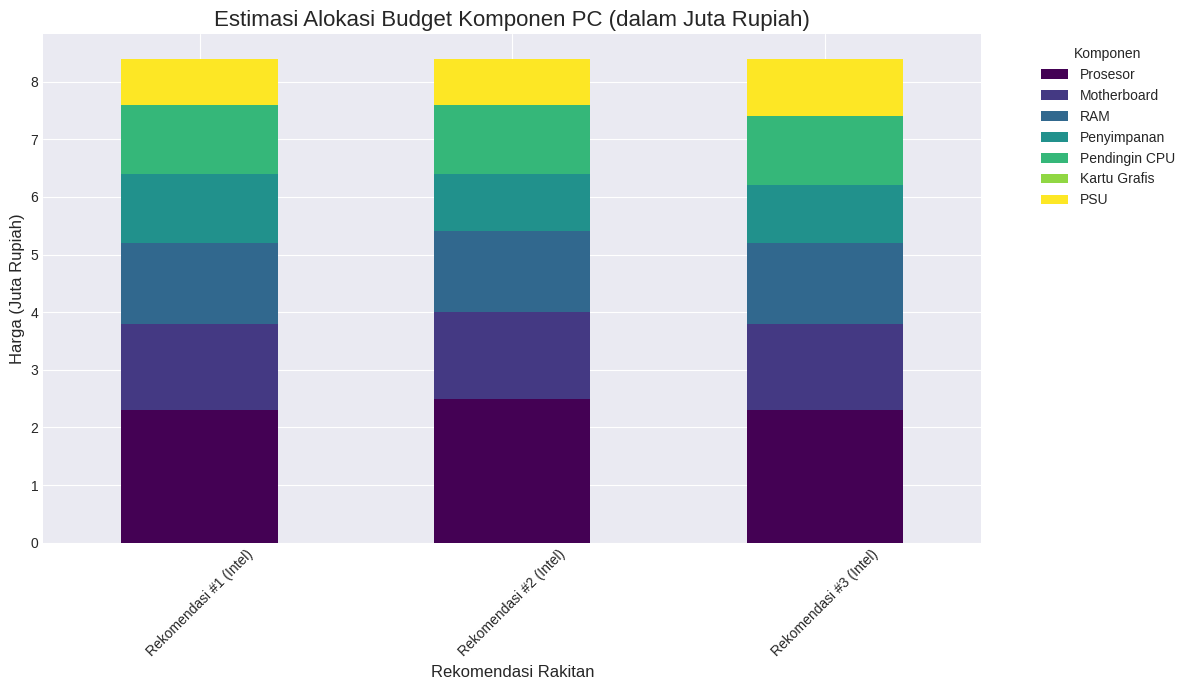


==================== Rekomendasi #1 ====================
Platform: **Intel**
- **Prosesor:** Core i5-10400 (Tier CPU: 5.0, Threads: 12.0) (Rp 2,300,000)
- **Motherboard:** ASUS PRIME B460M-A (Rp 1,500,000)
- **RAM:** G.Skill Ripjaws V 32GB (2x16GB) 3600MHz (32GB 3600MHz) (Rp 1,400,000)
- **Penyimpanan:** Samsung 970 EVO Plus 1TB NVMe (1000GB NVMe SSD (Tier 7)) (Rp 1,200,000)
- **Pendingin CPU:** Deepcool LT520 240mm AIO (Rated TDP: 280W, Tier Cooler: 7) (Rp 1,200,000)
- **Kartu Grafis:** Grafis Terintegrasi (Intel UHD Graphics 630) (Tier GPU: 5.0) (Rp 0)
- **PSU:** Corsair CV550 (550W, Tier PSU: 3) (Rp 800,000)
**Total Estimasi Harga: Rp 8,400,000 (Sedikit Melebihi Budget Sebesar Rp 400,000)**
*(Harga ini sedikit melebihi budget Anda, namun merupakan kombinasi optimal yang paling mendekati dan seimbang untuk performa.)*

**Strategi Upgrade (Tipe APU - Grafis Terintegrasi) untuk Data Analyst:**
Pilihan ini sangat hemat biaya dan ideal untuk penggunaan kasual, **analisis data dasar**, a

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

# --- 1. Fungsi untuk Memuat Data CSV ---
def load_data():
    """
    Memuat semua data komponen PC dari file CSV yang ada di sesi Colab.
    Mengembalikan DataFrame untuk CPU, Motherboard, RAM, GPU, PSU, Storage, dan Cooler.
    Menangani FileNotFoundError jika ada file yang tidak ditemukan.
    """
    try:
        df_cpu = pd.read_csv('prosesor.csv')
        df_mobo = pd.read_csv('motherboard.csv')
        df_ram = pd.read_csv('ram.csv')
        df_gpu = pd.read_csv('kartu_grafis.csv')
        df_psu = pd.read_csv('psu.csv')
        df_storage = pd.read_csv('storage.csv')
        df_cooler = pd.read_csv('cpu_cooler.csv')

        # --- PENTING: Konversi kolom numerik yang mungkin dibaca sebagai string ---
        df_cpu['tdp_watt'] = pd.to_numeric(df_cpu['tdp_watt'], errors='coerce').fillna(0).astype(int)
        df_cooler['tdp_rating_watt'] = pd.to_numeric(df_cooler['tdp_rating_watt'], errors='coerce').fillna(0).astype(int)
        df_gpu['rekomendasi_psu_watt'] = pd.to_numeric(df_gpu['rekomendasi_psu_watt'], errors='coerce').fillna(0).astype(int)
        df_psu['wattage'] = pd.to_numeric(df_psu['wattage'], errors='coerce').fillna(0).astype(int)


        return df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler
    except FileNotFoundError as e:
        print(f"Error: File CSV tidak ditemukan. Pastikan semua file CSV ({e.filename}) ada di sesi Colab Anda.")
        print("Silakan unggah file CSV (`prosesor.csv`, `motherboard.csv`, `ram.csv`, `kartu_grafis.csv`, `psu.csv`, `storage.csv`, `cpu_cooler.csv`) ke sesi Colab.")
        return None, None, None, None, None, None, None

# --- 2. Fungsi Rekomendasi Rakitan PC ---
def rekomendasikan_pc(budget, df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler):
    """
    Merekomendasikan rakitan PC yang seimbang untuk Data Analyst berdasarkan budget yang diberikan.
    Mempertimbangkan performa, kompatibilitas, bottleneck, dan jalur upgrade.
    """
    print(f"\n--- Mencari Rekomendasi Rakitan PC untuk Data Analyst dengan Budget Rp {budget:,.0f} ---")

    found_builds = [] # List untuk menyimpan semua rakitan yang ditemukan

    # Toleransi budget:
    # Maksimal 5% lebih atau Rp 500.000, mana yang lebih kecil
    budget_upper_bound = budget + min(budget * 0.05, 500000)
    # Minimal 10% kurang atau Rp 1.000.000, mana yang lebih kecil (agar tidak terlalu jauh di bawah)
    budget_lower_bound = budget - min(budget * 0.10, 1000000)
    if budget_lower_bound < 0: budget_lower_bound = 0 # Pastikan tidak negatif

    print(f"   (Mencari rakitan dalam rentang Rp {budget_lower_bound:,.0f} hingga Rp {budget_upper_bound:,.0f})")

    # --- Kriteria Filter Awal & Bottleneck Berdasarkan Budget ---
    # Alokasi budget awal yang lebih fleksibel untuk setiap komponen
    # Ini adalah filter pertama yang sangat longgar untuk memastikan komponen masuk daftar awal
    df_cpu_filtered = df_cpu[df_cpu['estimasi_harga_rp'] <= budget_upper_bound * 0.7].copy()
    df_mobo_filtered = df_mobo[df_mobo['estimasi_harga_rp'] <= budget_upper_bound * 0.4].copy()
    df_ram_filtered = df_ram[df_ram['estimasi_harga_rp'] <= budget_upper_bound * 0.4].copy()
    df_gpu_filtered = df_gpu[df_gpu['estimasi_harga_rp'] <= budget_upper_bound * 0.8].copy()
    df_psu_filtered = df_psu[df_psu['estimasi_harga_rp'] <= budget_upper_bound * 0.2].copy()
    df_storage_filtered = df_storage[df_storage['estimasi_harga_rp'] <= budget_upper_bound * 0.3].copy()
    df_cooler_filtered = df_cooler[df_cooler['estimasi_harga_rp'] <= budget_upper_bound * 0.15].copy()


    # Kriteria minimum performa/kapasitas berdasarkan budget
    min_cpu_tier = 1
    min_gpu_tier = 1
    min_ram_capacity = 8
    min_ram_speed = 2400
    min_psu_tier = 1
    min_storage_capacity_ssd = 120
    min_cooler_tier = 1

    if budget >= 20000000: # Super High-End
        min_cpu_tier = 9
        min_gpu_tier = 9
        min_ram_capacity = 64
        min_ram_speed = 6000
        min_psu_tier = 9
        min_storage_capacity_ssd = 2000
        min_cooler_tier = 8
    elif budget >= 10000000: # Mid-High (Fokus di sini untuk Rp 10 Juta)
        min_cpu_tier = 6
        min_gpu_tier = 5
        min_ram_capacity = 32 # NEW: 32GB RAM di atas 10jt
        min_ram_speed = 3200
        min_psu_tier = 4
        min_storage_capacity_ssd = 500
        min_cooler_tier = 3
    elif budget >= 7000000: # Mid-Range
        min_cpu_tier = 5
        min_gpu_tier = 4
        min_ram_capacity = 16 # NEW: 16GB RAM di atas 7jt
        min_ram_speed = 3200
        min_psu_tier = 3
        min_storage_capacity_ssd = 500
        min_cooler_tier = 3
    elif budget >= 4000000: # Entry-Mid (RP 4 Juta)
        min_cpu_tier = 4
        min_gpu_tier = 2
        min_ram_capacity = 16 # NEW: 16GB RAM untuk 4-7jt
        min_ram_speed = 3200
        min_psu_tier = 2
        min_storage_capacity_ssd = 240
        min_cooler_tier = 1 # Stock/basic cooler
    elif budget >= 2500000: # Entry-Level (APU focus) (RP 3 Juta)
        min_cpu_tier = 3
        min_gpu_tier = 1
        min_ram_capacity = 8 # NEW: 8GB RAM untuk <4jt
        min_ram_speed = 2400
        min_psu_tier = 1
        min_storage_capacity_ssd = 120
        min_cooler_tier = 1

    # Filter CPU agar tidak merekomendasikan i3 Gen 8 (nama model spesifik, karena sulit ditemukan)
    df_cpu_filtered = df_cpu_filtered[df_cpu_filtered['nama_model'] != 'Core i3-8100']

    # Terapkan filter berdasarkan tier minimum dan kapasitas
    df_cpu_filtered = df_cpu_filtered[df_cpu_filtered['performance_tier'] >= min_cpu_tier]
    df_gpu_filtered = df_gpu_filtered[df_gpu_filtered['performance_tier'] >= min_gpu_tier]

    # Filter RAM berdasarkan kapasitas dan kecepatan
    df_ram_filtered = df_ram_filtered[(df_ram_filtered['total_kapasitas_gb'] >= min_ram_capacity) &
                                      (df_ram_filtered['kecepatan_mhz'] >= min_ram_speed)]

    df_psu_filtered = df_psu_filtered[df_psu_filtered['performance_tier'] >= min_psu_tier]

    # Filter storage berdasarkan minimum SSD capacity, allow HDD too
    df_storage_filtered_ssd = df_storage_filtered[(df_storage_filtered['tipe_penyimpanan'].str.contains('SSD')) &
                                                  (df_storage_filtered['kapasitas_gb'] >= min_storage_capacity_ssd)]
    df_storage_filtered_hdd = df_storage_filtered[df_storage_filtered['tipe_penyimpanan'].str.contains('HDD')].copy()

    df_cooler_filtered = df_cooler_filtered[df_cooler_filtered['performance_tier'] >= min_cooler_tier]

    # Urutkan DataFrame yang difilter untuk mempercepat pencarian dan mendapatkan kombinasi terbaik lebih awal
    df_cpu_filtered = df_cpu_filtered.sort_values(by=['jumlah_thread', 'performance_tier', 'estimasi_harga_rp'], ascending=[False, False, True])
    df_mobo_filtered = df_mobo_filtered.sort_values(by='estimasi_harga_rp')
    df_ram_filtered = df_ram_filtered.sort_values(by=['total_kapasitas_gb', 'kecepatan_mhz', 'estimasi_harga_rp'], ascending=[False, False, True])
    df_gpu_filtered = df_gpu_filtered.sort_values(by=['performance_tier', 'estimasi_harga_rp'], ascending=[False, True])
    df_psu_filtered = df_psu_filtered.sort_values(by=['performance_tier', 'estimasi_harga_rp'], ascending=[False, True])
    df_storage_filtered_ssd = df_storage_filtered_ssd.sort_values(by=['performance_tier', 'kapasitas_gb', 'estimasi_harga_rp'], ascending=[False, False, True])
    df_storage_filtered_hdd = df_storage_filtered_hdd.sort_values(by=['kapasitas_gb', 'estimasi_harga_rp'], ascending=[False, True])
    df_cooler_filtered = df_cooler_filtered.sort_values(by=['performance_tier', 'estimasi_harga_rp'], ascending=[False, True])

    # --- Fungsi Pembantu untuk Menambah Rakitan yang Valid ---
    def add_build_if_valid(cpu, mobo, ram, gpu, psu, storage_primary, storage_secondary, cooler, use_integrated_gpu_flag):
        """
        Menambahkan kombinasi komponen ke found_builds jika valid dan sesuai budget.
        Mengecek kompatibilitas dasar dan bottleneck.
        """
        current_cost = cpu['estimasi_harga_rp'] + mobo['estimasi_harga_rp'] + ram['estimasi_harga_rp'] + psu['estimasi_harga_rp'] + storage_primary['estimasi_harga_rp'] + cooler['estimasi_harga_rp']

        storage_names = storage_primary['nama_model']
        storage_costs = storage_primary['estimasi_harga_rp']
        storage_capacities = f"{storage_primary['kapasitas_gb']}GB {storage_primary['tipe_penyimpanan']}"
        storage_tiers = storage_primary['performance_tier']

        # Add secondary HDD if needed and budget allows
        if storage_secondary is not None:
            current_cost += storage_secondary['estimasi_harga_rp']
            storage_names += f" + {storage_secondary['nama_model']}"
            storage_costs += storage_secondary['estimasi_harga_rp']
            storage_capacities += f" + {storage_secondary['kapasitas_gb']}GB {storage_secondary['tipe_penyimpanan']}"
            storage_tiers = (storage_primary['performance_tier'] + storage_secondary['performance_tier']) / 2


        gpu_tier_for_bottleneck = cpu['performance_tier']
        build_type = "Balanced (Dedicated GPU)"
        gpu_name = ""
        gpu_cost = 0

        # Skenario 1: Rakitan dengan Grafis Terintegrasi (APU/CPU dengan iGPU)
        if use_integrated_gpu_flag:
            if pd.isna(cpu['grafis_terintegrasi']) or cpu['grafis_terintegrasi'] == 'NA':
                return

            gpu_name = f"Grafis Terintegrasi ({cpu['grafis_terintegrasi']})"
            gpu_cost = 0
            build_type = "APU (Integrated Graphics)"

        # Skenario 2: Rakitan dengan Kartu Grafis Diskrit
        else:
            if gpu is None:
                return

            gpu_name = gpu['nama_model']
            gpu_cost = gpu['estimasi_harga_rp']
            gpu_tier_for_bottleneck = gpu['performance_tier']

            if psu['wattage'] < gpu['rekomendasi_psu_watt']:
                return

            # --- Bottleneck check (CPU vs GPU performance tier) ---
            if abs(cpu['performance_tier'] - gpu_tier_for_bottleneck) > 4:
                return

            # Tambahan: Jangan rekomendasikan GPU terlalu tua dengan CPU modern
            if cpu['performance_tier'] >= 8 and gpu_tier_for_bottleneck < 4:
                return

        total_cost = current_cost + gpu_cost
        # NEW: Check if total_cost is within the allowed range (lower_bound to upper_bound)
        if budget_lower_bound <= total_cost <= budget_upper_bound:
            found_builds.append({
                'merk_cpu': cpu['merk'],
                'prosesor': cpu['nama_model'],
                'harga_prosesor': cpu['estimasi_harga_rp'],
                'motherboard': mobo['nama_model'],
                'harga_motherboard': mobo['estimasi_harga_rp'],
                'ram': ram['nama_model'],
                'harga_ram': ram['estimasi_harga_rp'],
                'kartu_grafis': gpu_name,
                'harga_kartu_grafis': gpu_cost,
                'psu': psu['nama_model'],
                'wattage_psu': psu['wattage'],
                'harga_psu': psu['estimasi_harga_rp'],
                'storage': storage_names,
                'harga_storage': storage_costs,
                'cooler': cooler['nama_model'],
                'harga_cooler': cooler['estimasi_harga_rp'],
                'total_harga': total_cost,
                'avg_tier': (cpu['performance_tier'] + gpu_tier_for_bottleneck + storage_tiers) / 3,
                'build_type': build_type
            })

    # --- Proses Iterasi untuk Menemukan Kombinasi (Alur Baru dan Lebih Efisien!) ---
    print("\n### Membangun dan memfilter kombinasi rakitan... Ini mungkin butuh waktu beberapa detik. ###")

    # Batasi jumlah iterasi utama untuk efisiensi
    max_top_components = 50 # Jumlah komponen teratas dari setiap kategori untuk dipertimbangkan (bisa diatur lebih rendah jika masih lama)

    cpu_iter = df_cpu_filtered.head(max_top_components)
    mobo_iter = df_mobo_filtered.head(max_top_components)
    # df_ram_actual_filtered akan dibuat di dalam loop, jadi kita tidak head() di sini
    psu_iter = df_psu_filtered.head(max_top_components)
    storage_ssd_iter = df_storage_filtered_ssd.head(max_top_components)
    storage_hdd_iter = df_storage_filtered_hdd.head(max_top_components)
    cooler_iter = df_cooler_filtered.head(max_top_components)
    gpu_iter = df_gpu_filtered.head(max_top_components)

    # Iterasi utama: fokus pada CPU dan kemudian membangun sekitarnya
    for idx_cpu, cpu in cpu_iter.iterrows():
        # Cari Motherboard yang kompatibel dengan CPU
        df_mobo_compat = mobo_iter[mobo_iter['socket'] == cpu['socket']]
        if df_mobo_compat.empty: continue

        for idx_mobo, mobo in df_mobo_compat.iterrows():
            # NEW: Filter RAM berdasarkan kebutuhan budget dan mobo
            current_min_ram_capacity = 8
            current_min_ram_speed = 2400

            if budget >= 10000000:
                current_min_ram_capacity = 32
                current_min_ram_speed = 3200
            elif budget >= 4000000:
                current_min_ram_capacity = 16
                current_min_ram_speed = 3200

            df_ram_actual_filtered = df_ram_filtered[(df_ram_filtered['tipe_ram'] == mobo['tipe_ram_didukung']) &
                                                     (df_ram_filtered['total_kapasitas_gb'] >= current_min_ram_capacity) &
                                                     (df_ram_filtered['kecepatan_mhz'] >= current_min_ram_speed)].head(max_top_components)
            if df_ram_actual_filtered.empty: continue

            for idx_ram, ram in df_ram_actual_filtered.iterrows():
                # NEW: Strategi Cooler - Gunakan Stock Cooler jika budget <= Rp 6 Juta
                if budget <= 6000000:
                    cooler_options_for_cpu = df_cooler[
                        ((df_cooler['nama_model'] == 'Intel Stock Cooler') & (cpu['merk'] == 'Intel')) |
                        ((df_cooler['nama_model'] == 'AMD Wraith Stealth') & (cpu['merk'] == 'AMD')) |
                        (df_cooler['estimasi_harga_rp'] < 200000) # Include very cheap aftermarket ones
                    ].sort_values(by='estimasi_harga_rp').head(1)

                    if cooler_options_for_cpu.empty or cooler_options_for_cpu.iloc[0]['tdp_rating_watt'] < cpu['tdp_watt']:
                        # Fallback if stock/cheap cooler not enough/available
                        cooler_options_for_cpu = cooler_iter[cooler_iter['tdp_rating_watt'] >= cpu['tdp_watt']].head(1)

                    if cooler_options_for_cpu.empty: continue
                    cooler = cooler_options_for_cpu.iloc[0]
                else: # Budget > Rp 6 Juta, cari aftermarket cooler terbaik yang cocok
                    df_cooler_compat = cooler_iter[cooler_iter['tdp_rating_watt'] >= cpu['tdp_watt']]
                    if df_cooler_compat.empty: continue
                    cooler = df_cooler_compat.iloc[0]

                for idx_psu, psu in psu_iter.iterrows():
                    # NEW: Strategi Storage - SSD utama + (opsional HDD)
                    # Jika budget di bawah 5 juta, fokus SSD kecil + HDD. Di atas itu, SSD lebih besar.
                    current_min_ssd_capacity = 120
                    if budget >= 5000000:
                        current_min_ssd_capacity = 240
                    if budget >= 7000000:
                        current_min_ssd_capacity = 500

                    df_ssd_options = df_storage_filtered_ssd[df_storage_filtered_ssd['kapasitas_gb'] >= current_min_ssd_capacity].head(max_top_components)
                    if df_ssd_options.empty: continue

                    for idx_ssd_primary, ssd_primary in df_ssd_options.iterrows():
                        # Coba tambahkan HDD jika budget memungkinkan dan itu budget rendah-menengah
                        if budget < 15000000 and ssd_primary['kapasitas_gb'] < 1000: # Batas untuk coba kombinasi SSD+HDD
                            for idx_hdd_secondary, hdd_secondary in storage_hdd_iter.iterrows():
                                add_build_if_valid(cpu, mobo, ram, None, psu, ssd_primary, hdd_secondary, cooler, use_integrated_gpu_flag=True) # APU/iGPU dengan SSD+HDD
                                # Lalu, dengan dGPU dan SSD+HDD
                                for idx_gpu, gpu in gpu_iter.iterrows():
                                    add_build_if_valid(cpu, mobo, ram, gpu, psu, ssd_primary, hdd_secondary, cooler, use_integrated_gpu_flag=False)

                        # Hanya SSD utama (tanpa HDD sekunder)
                        add_build_if_valid(cpu, mobo, ram, None, psu, ssd_primary, None, cooler, use_integrated_gpu_flag=True) # APU/iGPU dengan SSD saja
                        for idx_gpu, gpu in gpu_iter.iterrows():
                            add_build_if_valid(cpu, mobo, ram, gpu, psu, ssd_primary, None, cooler, use_integrated_gpu_flag=False)


    if not found_builds:
        print("\nMaaf, tidak ditemukan rakitan yang cocok dengan budget Anda dari data yang tersedia.")
        print("Coba sesuaikan budget atau tambahkan lebih banyak pilihan komponen ke file CSV.")
        return

    # --- Urutkan Rakitan yang Ditemukan ---
    # Prioritas sorting:
    # 1. Build Type (APU/iGPU first, then Dedicated GPU builds)
    # 2. RAM Capacity (more RAM is better for Data Analyst)
    # 3. CPU Threads (more threads is better for Data Analyst)
    # 4. Storage Performance Tier (faster storage for Data Analyst)
    # 5. Total Price (closest to budget, i.e., highest total price within budget)
    # 6. Average Performance Tier (overall balance)
    found_builds.sort(key=lambda x: (
        x['build_type'] != "APU (Integrated Graphics)",
        -df_ram[df_ram['nama_model'] == x['ram']]['total_kapasitas_gb'].iloc[0],
        -df_cpu[df_cpu['nama_model'] == x['prosesor']]['jumlah_thread'].iloc[0],
        # Safely access storage tier, considering combined storage names
        -df_storage[df_storage['nama_model'] == x['storage'].split(' + ')[0]]['performance_tier'].iloc[0],
        -x['total_harga'],
        -x['avg_tier']
    ))

    print(f"\n--- Ditemukan {len(found_builds)} Rakitan dalam Budget Anda ---")
    print("Menampilkan 3 Rekomendasi Terbaik (paling seimbang dan optimal untuk budget Data Analyst):")

    # Ambil hingga 3 rakitan unik untuk ditampilkan
    displayed_builds = []
    seen_combinations = set()

    for build in found_builds:
        # Buat fingerprint unik untuk kombinasi komponen utama (tanpa harga)
        fingerprint = (build['prosesor'], build['motherboard'], build['ram'], build['kartu_grafis'], build['psu'], build['storage'], build['cooler'])
        if fingerprint not in seen_combinations:
            displayed_builds.append(build)
            seen_combinations.add(fingerprint)
            if len(displayed_builds) >= 3:
                break

    if not displayed_builds:
        print("Tidak ada rekomendasi unik yang ditemukan setelah penyaringan.")
        return

    # --- Bagian Visualisasi ---
    plot_data = []
    labels = []
    for i, build in enumerate(displayed_builds):
        labels.append(f"Rekomendasi #{i+1} ({build['merk_cpu']})")
        plot_data.append({
            'Prosesor': build['harga_prosesor'],
            'Motherboard': build['harga_motherboard'],
            'RAM': build['harga_ram'],
            'Penyimpanan': build['harga_storage'],
            'Pendingin CPU': build['harga_cooler'],
            'Kartu Grafis': build['harga_kartu_grafis'],
            'PSU': build['harga_psu']
        })

    if plot_data:
        df_plot = pd.DataFrame(plot_data, index=labels)
        df_plot = df_plot.div(1_000_000) # Konversi ke jutaan Rupiah untuk skala yang lebih baik

        fig, ax = plt.subplots(figsize=(12, 7))
        df_plot.plot(kind='bar', stacked=True, ax=ax, cmap='viridis') # Menggunakan colormap 'viridis'

        ax.set_title('Estimasi Alokasi Budget Komponen PC (dalam Juta Rupiah)', fontsize=16)
        ax.set_ylabel('Harga (Juta Rupiah)', fontsize=12)
        ax.set_xlabel('Rekomendasi Rakitan', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Komponen', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # --- Menampilkan Detail Rekomendasi ---
    for i, build in enumerate(displayed_builds):
        print(f"\n==================== Rekomendasi #{i+1} ====================")
        print(f"Platform: **{build['merk_cpu']}**")

        cpu_tier = df_cpu[df_cpu['nama_model'] == build['prosesor']]['performance_tier'].iloc[0]
        cpu_threads = df_cpu[df_cpu['nama_model'] == build['prosesor']]['jumlah_thread'].iloc[0]
        print(f"- **Prosesor:** {build['prosesor']} (Tier CPU: {cpu_tier}, Threads: {cpu_threads}) (Rp {build['harga_prosesor']:,.0f})")

        print(f"- **Motherboard:** {build['motherboard']} (Rp {build['harga_motherboard']:,.0f})")

        ram_capacity = df_ram[df_ram['nama_model'] == build['ram']]['total_kapasitas_gb'].iloc[0]
        ram_speed = df_ram[df_ram['nama_model'] == build['ram']]['kecepatan_mhz'].iloc[0]
        print(f"- **RAM:** {build['ram']} ({ram_capacity}GB {ram_speed}MHz) (Rp {build['harga_ram']:,.0f})")

        storage_parts = [s.strip() for s in build['storage'].split('+')]
        storage_display_info = []
        for part_name in storage_parts:
            original_storage_row = df_storage[df_storage['nama_model'] == part_name].iloc[0]
            storage_display_info.append(f"{original_storage_row['kapasitas_gb']}GB {original_storage_row['tipe_penyimpanan']} (Tier {original_storage_row['performance_tier']})")

        print(f"- **Penyimpanan:** {build['storage']} ({', '.join(storage_display_info)}) (Rp {build['harga_storage']:,.0f})")


        cooler_tier = df_cooler[df_cooler['nama_model'] == build['cooler']]['performance_tier'].iloc[0]
        cooler_tdp_rating = df_cooler[df_cooler['nama_model'] == build['cooler']]['tdp_rating_watt'].iloc[0]
        print(f"- **Pendingin CPU:** {build['cooler']} (Rated TDP: {cooler_tdp_rating}W, Tier Cooler: {cooler_tier}) (Rp {build['harga_cooler']:,.0f})")

        gpu_tier_display = "N/A"
        if build['kartu_grafis'].startswith("Grafis Terintegrasi"):
            gpu_tier_display = df_cpu[df_cpu['nama_model'] == build['prosesor']]['performance_tier'].iloc[0]
        else:
            gpu_tier_display = df_gpu[df_gpu['nama_model'] == build['kartu_grafis']]['performance_tier'].iloc[0]

        print(f"- **Kartu Grafis:** {build['kartu_grafis']} (Tier GPU: {gpu_tier_display}) (Rp {build['harga_kartu_grafis']:,.0f})")
        psu_tier = df_psu[df_psu['nama_model'] == build['psu']]['performance_tier'].iloc[0]
        print(f"- **PSU:** {build['psu']} ({build['wattage_psu']}W, Tier PSU: {psu_tier}) (Rp {build['harga_psu']:,.0f})")

        # Keterangan Toleransi Budget
        if build['total_harga'] > budget:
            excess_amount = build['total_harga'] - budget
            print(f"**Total Estimasi Harga: Rp {build['total_harga']:,.0f} (Sedikit Melebihi Budget Sebesar Rp {excess_amount:,.0f})**")
            print("*(Harga ini sedikit melebihi budget Anda, namun merupakan kombinasi optimal yang paling mendekati dan seimbang untuk performa.)*")
        else: # Harga di bawah atau tepat budget
            short_amount = budget - build['total_harga']
            if short_amount > 0:
                print(f"**Total Estimasi Harga: Rp {build['total_harga']:,.0f} (Masih Ada Sisa Budget Sebesar Rp {short_amount:,.0f})**")
                print("*(Kombinasi ini berada di bawah budget Anda, namun menawarkan keseimbangan performa yang sangat baik untuk Data Analyst.)*")
            else:
                print(f"**Total Estimasi Harga: Rp {build['total_harga']:,.0f}**")
        print("==========================================================")

        # --- Penjelasan Strategi Upgrade ---
        if build['build_type'] == "APU (Integrated Graphics)":
            print("\n**Strategi Upgrade (Tipe APU - Grafis Terintegrasi) untuk Data Analyst:**")
            print("Pilihan ini sangat hemat biaya dan ideal untuk penggunaan kasual, **analisis data dasar**, atau *prototyping* cepat. Keunggulan utamanya adalah **jalur upgrade yang mudah untuk performa CPU.** Anda bisa meningkatkan prosesor ke seri Ryzen yang lebih tinggi di masa depan (misalnya, Ryzen 7 atau Ryzen 9 generasi yang sama) tanpa perlu mengganti motherboard dan RAM, asalkan tetap di platform AM4/AM5. Ini bagus untuk Data Analyst yang mungkin butuh CPU lebih kuat dan RAM lebih besar di kemudian hari tanpa investasi besar di awal pada GPU. Jika Anda ingin meningkatkan performa gaming atau **akselerasi Machine Learning/Data Science yang signifikan**, Anda bisa menambahkan kartu grafis diskrit kapan saja.")
            print("Namun, perlu diingat bahwa performa grafis awal (dari iGPU) mungkin tidak sekuat rakitan dengan kartu grafis diskrit pada harga yang sedikit lebih tinggi. Investasi awal difokuskan pada fondasi yang fleksibel untuk CPU dan RAM yang kuat.")
        else: # Dedicated GPU build
            print("\n**Strategi Upgrade (Tipe Seimbang - Dengan Kartu Grafis Diskrit) untuk Data Analyst:**")
            print("Rakituan ini menawarkan performa yang lebih tinggi sejak awal, terutama dalam beban kerja yang mengandalkan GPU (seperti **visualisasi data kompleks, Machine Learning, Deep Learning, atau komputasi paralel**) serta pemrosesan CPU yang kuat. Anda akan mendapatkan pengalaman yang lebih lancar. Untuk upgrade di masa depan, Anda bisa mengganti kartu grafis dengan yang lebih baru untuk peningkatan performa grafis. Namun, jika Anda ingin upgrade prosesor ke generasi yang jauh lebih baru (misalnya, dari Intel Gen 12 ke Gen 15, atau Ryzen Zen 4 ke Zen 6), kemungkinan besar Anda **perlu mengganti motherboard dan mungkin RAM** juga, yang berarti biaya upgrade keseluruhan bisa lebih tinggi.")
            print("Pilihan ini cocok jika Anda membutuhkan performa maksimal dari budget awal Anda dan siap untuk investasi yang lebih besar untuk upgrade di masa depan. Fokus pada **CPU multi-core/thread, RAM besar, dan SSD NVMe cepat** di awal akan memberikan fondasi kuat untuk tugas Data Analyst yang intensif.")

    print("\n*Catatan: Harga adalah estimasi dan dapat bervariasi. Pastikan untuk memeriksa ketersediaan dan kompatibilitas terbaru.")
    print("*Rekomendasi ini juga mencoba menyeimbangkan performa komponen untuk menghindari bottleneck yang signifikan.")
    print("Untuk Data Analyst, prioritaskan **RAM (16GB+), CPU dengan banyak core/thread, dan SSD cepat**.")


# --- 3. Bagian Utama Program (Pastikan ini ada!) ---
if __name__ == "__main__":
    # Muat semua data komponen
    df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler = load_data()

    # Periksa apakah semua data berhasil dimuat
    if df_cpu is not None and df_mobo is not None and df_ram is not None and \
       df_gpu is not None and df_psu is not None and df_storage is not None and \
       df_cooler is not None:
        print("Selamat datang di Pembantu Rakit PC untuk Data Analyst!")
        while True:
            try:
                # Meminta input budget dari pengguna
                budget_input = input("Masukkan budget Anda (dalam Rupiah, contoh: 5000000): ")
                budget = int(budget_input)
                if budget <= 0:
                    print("Budget harus lebih dari nol. Silakan masukkan nilai yang valid.")
                    continue
                break
            except ValueError:
                print("Input tidak valid. Harap masukkan angka saja (contoh: 5000000).")

        # Panggil fungsi rekomendasi dengan budget yang dimasukkan
        rekomendasikan_pc(budget, df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler)
    else:
        print("\nProgram tidak dapat berjalan karena ada file CSV yang tidak ditemukan atau gagal dimuat.")
        print("Pastikan semua file CSV sudah diunggah dengan benar ke sesi Google Colab Anda.")

Data berhasil dimuat. Melakukan Analisis Data Eksploratif...


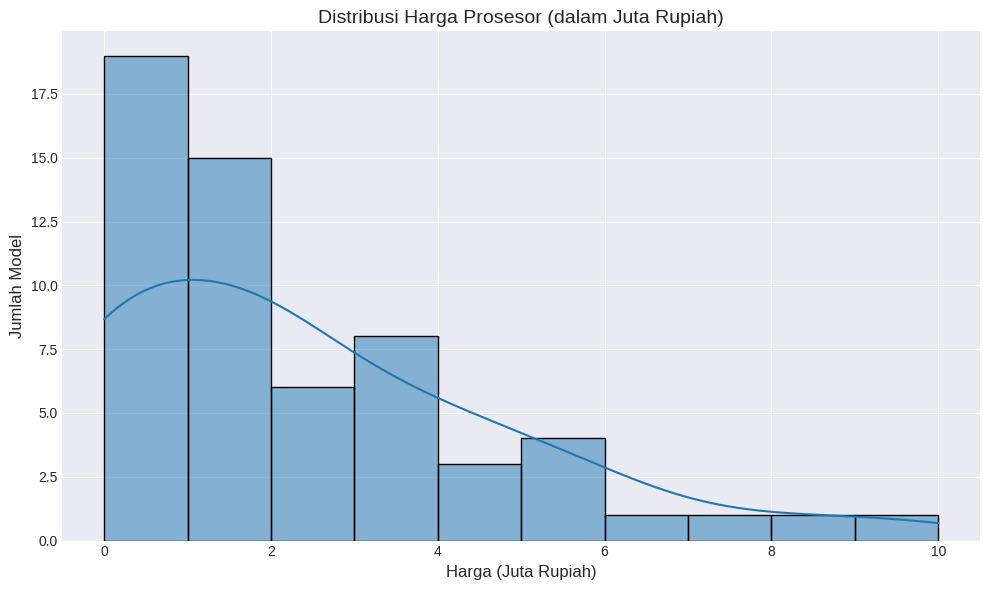

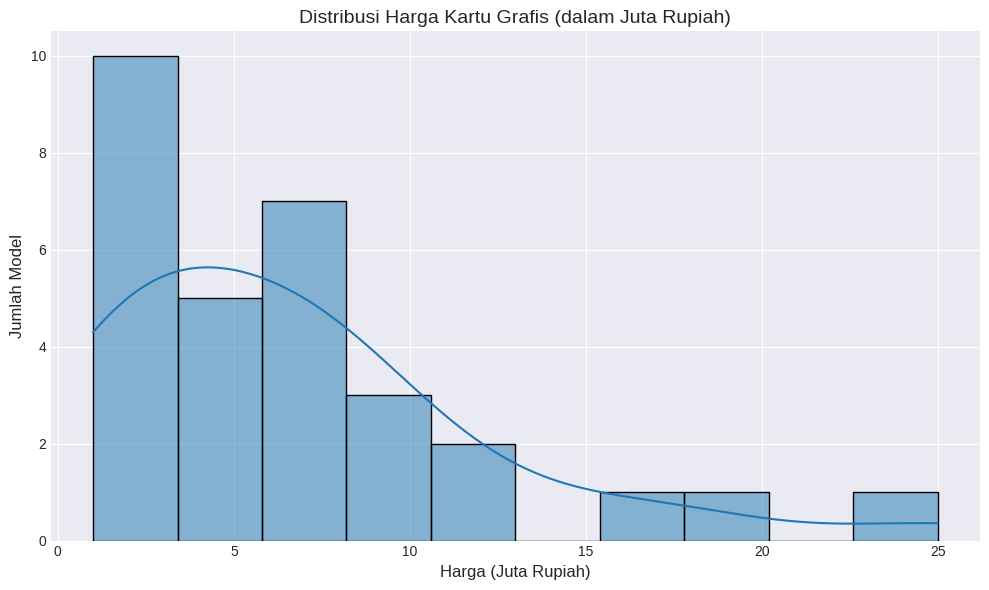

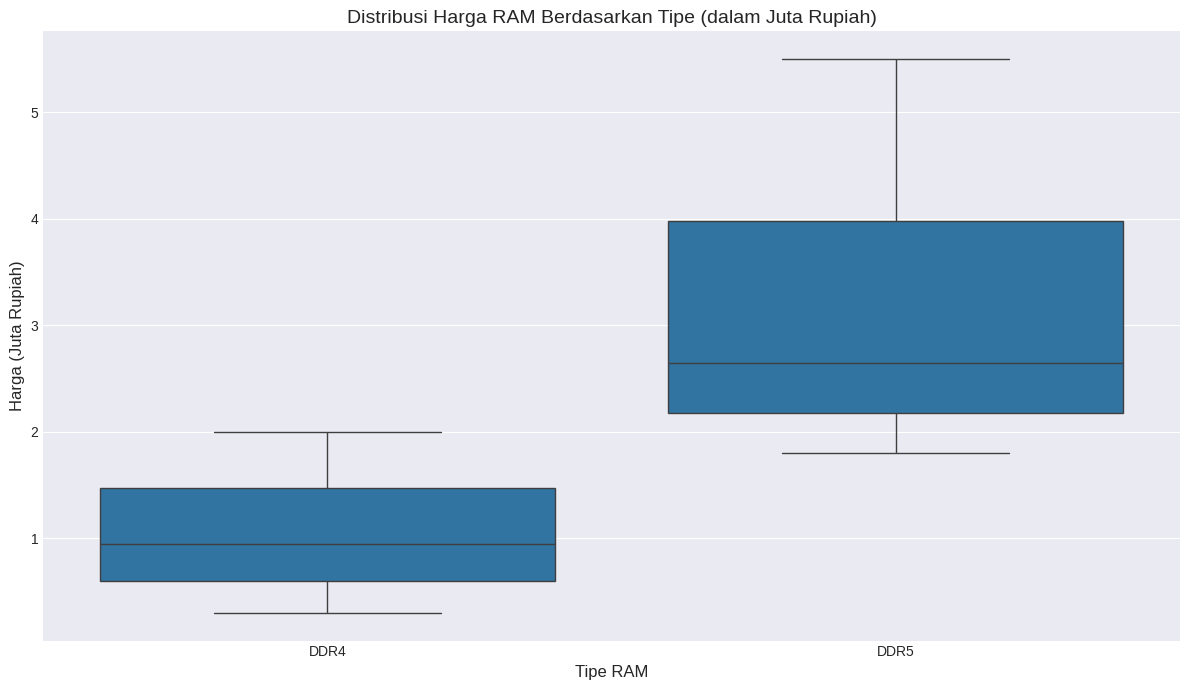

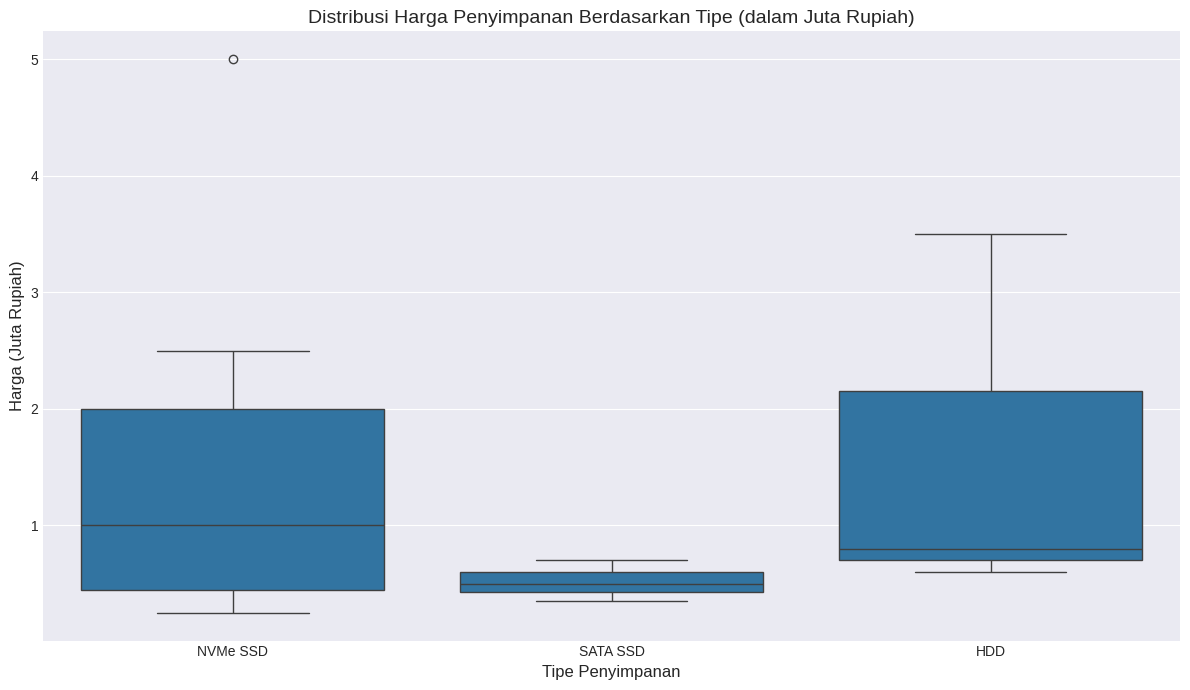

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

# --- Fungsi untuk Memuat Data CSV (sama seperti di alat rekomendasi) ---
def load_data_for_eda():
    try:
        df_cpu = pd.read_csv('prosesor.csv')
        df_mobo = pd.read_csv('motherboard.csv')
        df_ram = pd.read_csv('ram.csv')
        df_gpu = pd.read_csv('kartu_grafis.csv')
        df_psu = pd.read_csv('psu.csv')
        df_storage = pd.read_csv('storage.csv')
        df_cooler = pd.read_csv('cpu_cooler.csv')

        # --- PENTING: Konversi kolom numerik yang mungkin dibaca sebagai string ---
        df_cpu['tdp_watt'] = pd.to_numeric(df_cpu['tdp_watt'], errors='coerce').fillna(0).astype(int)
        df_cooler['tdp_rating_watt'] = pd.to_numeric(df_cooler['tdp_rating_watt'], errors='coerce').fillna(0).astype(int)
        df_gpu['rekomendasi_psu_watt'] = pd.to_numeric(df_gpu['rekomendasi_psu_watt'], errors='coerce').fillna(0).astype(int)
        df_psu['wattage'] = pd.to_numeric(df_psu['wattage'], errors='coerce').fillna(0).astype(int)

        return df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler
    except FileNotFoundError as e:
        print(f"Error: File CSV tidak ditemukan. Pastikan semua file CSV ({e.filename}) ada di sesi Colab Anda.")
        print("Silakan unggah semua file CSV (`prosesor.csv`, `motherboard.csv`, `ram.csv`, `kartu_grafis.csv`, `psu.csv`, `storage.csv`, `cpu_cooler.csv`) ke sesi Colab.")
        return None, None, None, None, None, None, None

# Muat data
df_cpu, df_mobo, df_ram, df_gpu, df_psu, df_storage, df_cooler = load_data_for_eda()

if df_cpu is None: # Hentikan jika gagal memuat data
    print("Gagal memuat data. Mohon periksa kembali file CSV Anda.")
    exit() # Keluar dari skrip jika data tidak ada

print("Data berhasil dimuat. Melakukan Analisis Data Eksploratif...")



### 3.1. Distribusi Harga Komponen Utama


# --- Distribusi Harga Prosesor ---
plt.figure(figsize=(10, 6))
sns.histplot(df_cpu['estimasi_harga_rp'] / 1_000_000, kde=True, bins=10)
plt.title('Distribusi Harga Prosesor (dalam Juta Rupiah)', fontsize=14)
plt.xlabel('Harga (Juta Rupiah)', fontsize=12)
plt.ylabel('Jumlah Model', fontsize=12)
plt.tight_layout()
plt.show()

# --- Distribusi Harga Kartu Grafis ---
plt.figure(figsize=(10, 6))
sns.histplot(df_gpu['estimasi_harga_rp'] / 1_000_000, kde=True, bins=10)
plt.title('Distribusi Harga Kartu Grafis (dalam Juta Rupiah)', fontsize=14)
plt.xlabel('Harga (Juta Rupiah)', fontsize=12)
plt.ylabel('Jumlah Model', fontsize=12)
plt.tight_layout()
plt.show()

# --- Distribusi Harga RAM (dibagi DDR4 dan DDR5) ---
plt.figure(figsize=(12, 7))
sns.boxplot(x='tipe_ram', y=df_ram['estimasi_harga_rp'] / 1_000_000, data=df_ram)
plt.title('Distribusi Harga RAM Berdasarkan Tipe (dalam Juta Rupiah)', fontsize=14)
plt.xlabel('Tipe RAM', fontsize=12)
plt.ylabel('Harga (Juta Rupiah)', fontsize=12)
plt.tight_layout()
plt.show()

# --- Distribusi Harga Penyimpanan (SSD vs HDD) ---
plt.figure(figsize=(12, 7))
sns.boxplot(x='tipe_penyimpanan', y=df_storage['estimasi_harga_rp'] / 1_000_000, data=df_storage)
plt.title('Distribusi Harga Penyimpanan Berdasarkan Tipe (dalam Juta Rupiah)', fontsize=14)
plt.xlabel('Tipe Penyimpanan', fontsize=12)
plt.ylabel('Harga (Juta Rupiah)', fontsize=12)
plt.tight_layout()
plt.show()

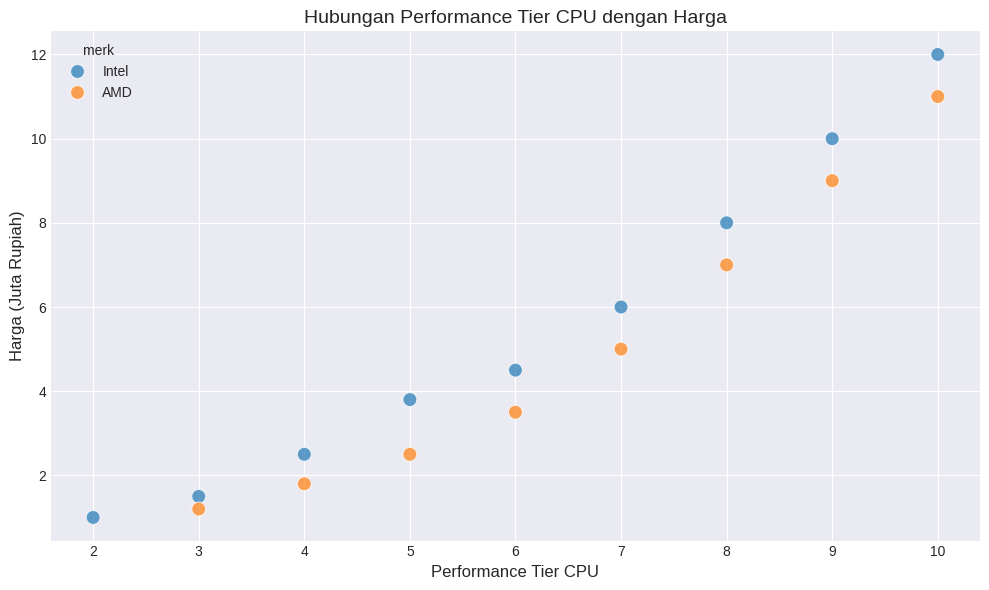

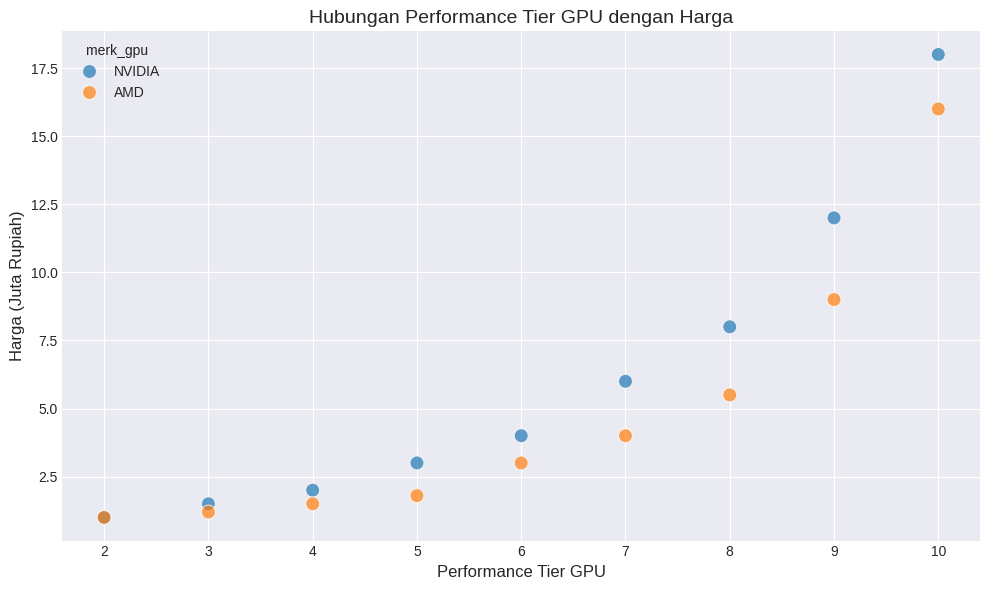

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

# Asumsi df_cpu dan df_gpu sudah dimuat dari file CSV
# Jika belum, kamu bisa jalankan bagian load_data_for_eda() dulu
# Untuk contoh ini, saya akan membuat DataFrame dummy agar kode bisa diuji langsung
data_cpu = {
    'performance_tier': [2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 5, 6, 7, 8, 9, 10],
    'estimasi_harga_rp': [1000000, 1500000, 2500000, 3800000, 4500000, 6000000, 8000000, 10000000, 12000000, 1200000, 1800000, 2500000, 3500000, 5000000, 7000000, 9000000, 11000000],
    'merk': ['Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD']
}
df_cpu = pd.DataFrame(data_cpu)

data_gpu = {
    'performance_tier': [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'estimasi_harga_rp': [1000000, 1500000, 2000000, 3000000, 4000000, 6000000, 8000000, 12000000, 18000000, 1000000, 1200000, 1500000, 1800000, 3000000, 4000000, 5500000, 9000000, 16000000],
    'merk_gpu': ['NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'NVIDIA', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD', 'AMD']
}
df_gpu = pd.DataFrame(data_gpu)


# --- Scatter Plot: Performance Tier CPU vs. Harga ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='performance_tier', y=df_cpu['estimasi_harga_rp'] / 1_000_000, hue='merk', data=df_cpu, s=100, alpha=0.7)
plt.title('Hubungan Performance Tier CPU dengan Harga', fontsize=14) # Corrected: fontsize=14
plt.xlabel('Performance Tier CPU', fontsize=12)
plt.ylabel('Harga (Juta Rupiah)', fontsize=12)
# Pastikan xticks hanya mengambil unique values yang ada di kolom performance_tier
plt.xticks(sorted(df_cpu['performance_tier'].unique()))
plt.tight_layout()
plt.show() # Panggil show() setelah grafik CPU siap

# --- Scatter Plot: Performance Tier GPU vs. Harga ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='performance_tier', y=df_gpu['estimasi_harga_rp'] / 1_000_000, hue='merk_gpu', data=df_gpu, s=100, alpha=0.7)
plt.title('Hubungan Performance Tier GPU dengan Harga', fontsize=14) # Corrected: fontsize=14
plt.xlabel('Performance Tier GPU', fontsize=12)
plt.ylabel('Harga (Juta Rupiah)', fontsize=12)
# Pastikan xticks hanya mengambil unique values yang ada di kolom performance_tier
plt.xticks(sorted(df_gpu['performance_tier'].unique()))
plt.tight_layout()
plt.show() # Panggil show() setelah grafik GPU siap

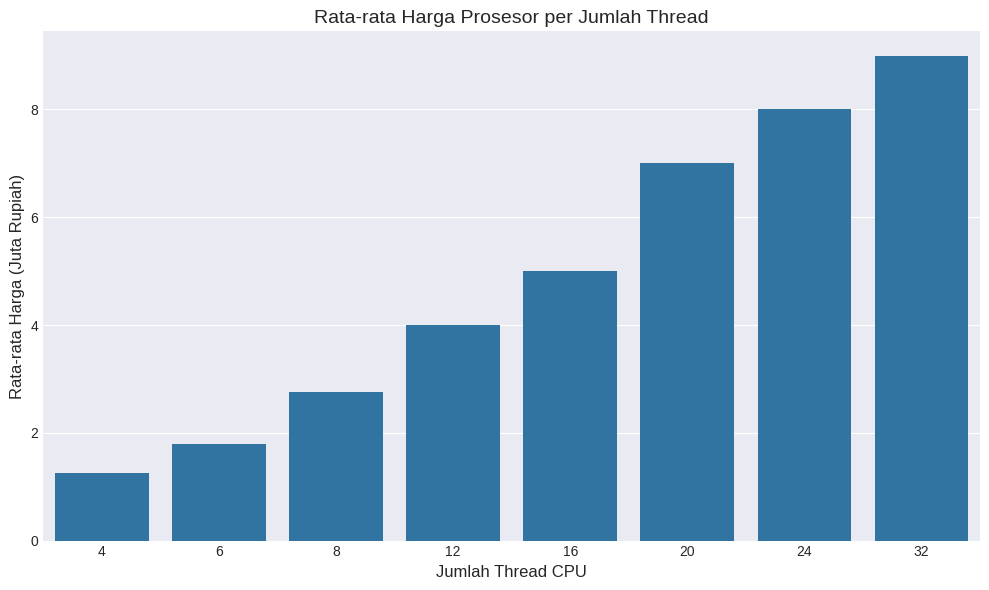

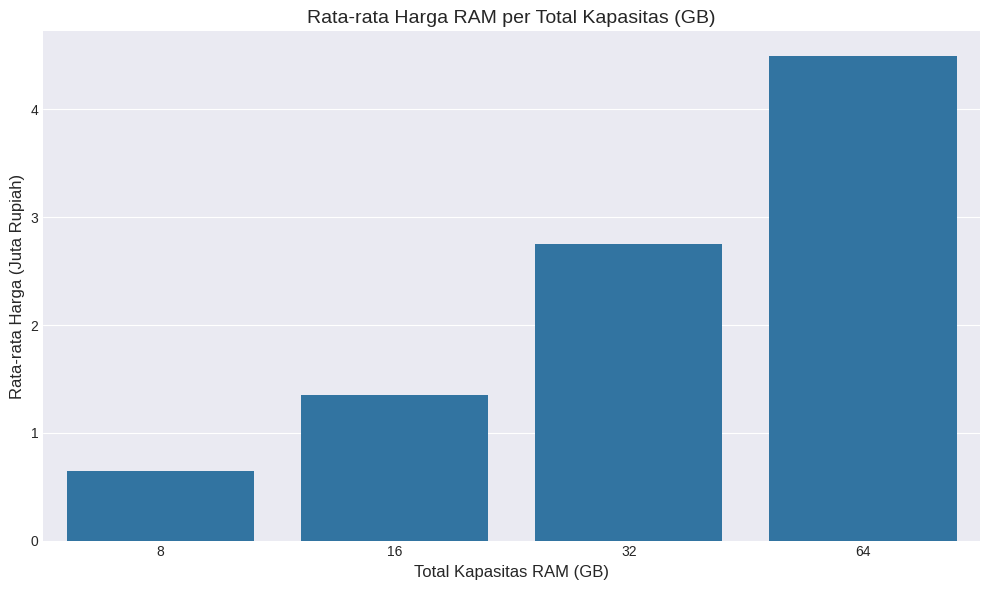

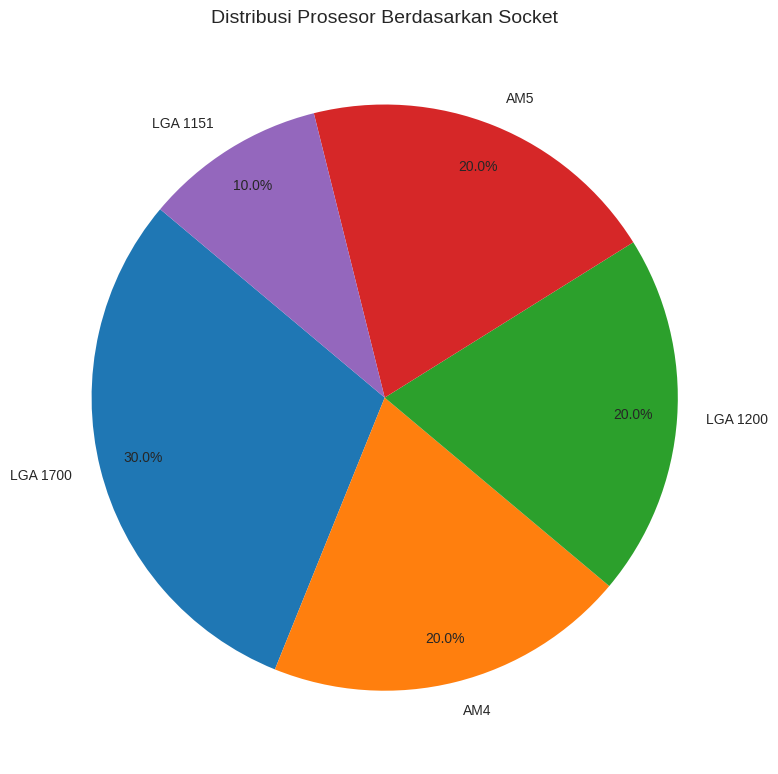

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

# --- Dummy DataFrames for testing if actual data isn't loaded yet ---
# In your full Colab script, df_cpu, df_ram are loaded from CSVs.
# This dummy data allows the plotting code to run independently for testing.
data_cpu = {
    'jumlah_thread': [4, 4, 6, 8, 8, 12, 16, 20, 24, 32],
    'estimasi_harga_rp': [1000000, 1500000, 1800000, 2500000, 3000000, 4000000, 5000000, 7000000, 8000000, 9000000],
    'socket': ['LGA 1151', 'LGA 1200', 'LGA 1200', 'LGA 1700', 'AM4', 'AM4', 'AM5', 'LGA 1700', 'AM5', 'LGA 1700']
}
df_cpu = pd.DataFrame(data_cpu)

data_ram = {
    'total_kapasitas_gb': [8, 8, 16, 16, 32, 32, 64, 64],
    'estimasi_harga_rp': [500000, 800000, 1200000, 1500000, 2500000, 3000000, 4000000, 5000000],
    'tipe_ram': ['DDR4', 'DDR4', 'DDR4', 'DDR5', 'DDR4', 'DDR5', 'DDR5', 'DDR5'] # Added for example
}
df_ram = pd.DataFrame(data_ram)

# --- Bar Chart: Rata-rata Harga per Jumlah Thread CPU ---
plt.figure(figsize=(10, 6))
cpu_threads_avg_price = df_cpu.groupby('jumlah_thread')['estimasi_harga_rp'].mean().reset_index()
sns.barplot(x='jumlah_thread', y=cpu_threads_avg_price['estimasi_harga_rp'] / 1_000_000, data=cpu_threads_avg_price)
plt.title('Rata-rata Harga Prosesor per Jumlah Thread', fontsize=14)
plt.xlabel('Jumlah Thread CPU', fontsize=12)
plt.ylabel('Rata-rata Harga (Juta Rupiah)', fontsize=12)
plt.tight_layout()
plt.show() # Call show() for the first plot

# --- Bar Chart: Rata-rata Harga per Kapasitas RAM ---
plt.figure(figsize=(10, 6))
ram_capacity_avg_price = df_ram.groupby('total_kapasitas_gb')['estimasi_harga_rp'].mean().reset_index()
sns.barplot(x='total_kapasitas_gb', y=ram_capacity_avg_price['estimasi_harga_rp'] / 1_000_000, data=ram_capacity_avg_price)
plt.title('Rata-rata Harga RAM per Total Kapasitas (GB)', fontsize=14)
plt.xlabel('Total Kapasitas RAM (GB)', fontsize=12)
plt.ylabel('Rata-rata Harga (Juta Rupiah)', fontsize=12)
plt.tight_layout()
plt.show() # Call show() for the second plot

# --- Pie Chart: Distribusi Prosesor Berdasarkan Socket (untuk melihat jalur upgrade) ---
plt.figure(figsize=(8, 8))
socket_counts = df_cpu['socket'].value_counts()
plt.pie(socket_counts, labels=socket_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85) # Added pctdistance for label clarity
plt.title('Distribusi Prosesor Berdasarkan Socket', fontsize=14)
plt.ylabel('') # Hide default y-label for pie chart
plt.tight_layout()
plt.show() # Call show() for the third plot